# 0.0 Imports

In [81]:
import math
import inflection
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from IPython.core.display import HTML
from IPython.display import Image

pd.__version__

'1.3.4'

## 0.1 Helper Functions

## 0.2 Loading Data

In [8]:
# Raw seria a marcação de arquivo que não foi limpo ainda (acabou de ler)
df_sales_raw = pd.read_csv("train.csv",low_memory = False)
df_store_raw = pd.read_csv("store.csv",low_memory = False)

In [9]:
# Merge (método da classe pandas) 1arg- documento que será referencia 2arg- arquivo que será anexado how:como fará e on a coluna em comum
df_raw = pd.merge(df_sales_raw, df_store_raw, how="left", on="Store")

# 1.0 Descrição dos Dados (Passo 1)

In [10]:
#fazer cópia dos dados, para não usar em cima do original
df1 = df_raw.copy()

In [11]:
df_raw.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

## 1.1 Rename Columns

In [12]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

# função para deixar a lista em minúsculo e em snakecase(_)
snakecase = lambda x: inflection.underscore (x)
cols_new = list(map(snakecase, cols_old))

#rename
df1.columns = cols_new

In [13]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2 Data Dimensions

In [14]:
print ("Number of Rows:{}".format(df1.shape[0]))
print ("Number of Cols:{}".format(df1.shape[1]))

Number of Rows:1017209
Number of Cols:18


## 1.3 Data Types

In [15]:
# mudar a data de object para forma de data
df1["date"] = pd.to_datetime(df1["date"])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Check NA

In [16]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 Fillout NA (Substituindo os dados faltantes)

In [17]:
### 3 formas de tratar os "na"
### 1- exclui, mas perde informação
### 2- ML para substituição no comportameno da coluna (Mediana ou media clusterização ou predição dos valores vazios)
### 3-pensar no negócio (pq gerou o NA)

In [18]:
df1.sample()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
277859,403,1,2014-11-17,6954,775,1,0,0,0,a,a,4970.0,7.0,2015.0,0,NaN,NaN,NaN


In [19]:
df1["competition_distance"].max()

75860.0

In [20]:
#competition_distance colocar 0 no lugar de NA Lambda é assim pq só tem 1 coluna
df1["competition_distance"] = df1["competition_distance"].apply (lambda x:200000.0 if math.isnan(x) else x)

#competition_open_since_month aqui aplica assim pq tem mais de uma coluna para analisar (por isso o Axis:1, se fosse axis 0 seria ao longo da linha)
df1["competition_open_since_month"] = df1.apply(lambda x: x["date"].month if math.isnan( x["competition_open_since_month"]) else x["competition_open_since_month"], axis=1)

#competition_open_since_year
df1["competition_open_since_year"] = df1.apply(lambda x: x["date"].year if math.isnan( x["competition_open_since_year"]) else x["competition_open_since_year"], axis=1)

#promo2_since_week
df1["promo2_since_week"] = df1.apply(lambda x: x["date"].week if math.isnan( x["promo2_since_week"]) else x["promo2_since_week"], axis=1)

#promo2_since_year
df1["promo2_since_year"] = df1.apply(lambda x: x["date"].year if math.isnan( x["promo2_since_year"]) else x["promo2_since_year"], axis=1)


In [21]:
#promo_interval Inplace=True faz a modificação direto na coluna e Fillna vai preencher com 0
month_map={1:"Jan", 2:"Fev", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}

df1["promo_interval"].fillna(0, inplace=True)

#Mapeia a o dicionario dentro da coluna (para saber se está dentro da promoção, se 0 não participa da promoção se 1 participa)
df1["month_map"] = df1["date"].dt.month.map(month_map)

df1["is_promo"] = df1[["promo_interval", "month_map"]].apply(lambda x: 0 if x["promo_interval"] == 0 else 1 if x["month_map"] in x["promo_interval"].split(",") else 0, axis=1)


In [22]:
#T = Transpose
df1.sample(5).T

,282416,11246,372572,42903,790651
store,269,97,745,534,902
day_of_week,3,2,5,2,2
date,2014-11-12 00:00:00,2015-07-21 00:00:00,2014-08-08 00:00:00,2015-06-23 00:00:00,2013-07-23 00:00:00
sales,10223,5236,7652,5081,3918
customers,1316,550,770,411,603
open,1,1,1,1,1
promo,1,0,1,0,0
state_holiday,0,0,0,0,0
school_holiday,0,1,1,0,0
store_type,a,d,a,d,a


In [23]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6 Change Types (Estatística Descritiva)


In [24]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [25]:
df1["competition_open_since_month"] = df1["competition_open_since_month"].astype(int)
df1["competition_open_since_year"] = df1["competition_open_since_year"].astype(int)

df1["promo2_since_week"] = df1["promo2_since_week"].astype(int)
df1["promo2_since_year"] = df1["promo2_since_year"].astype(int)

In [26]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.7 Descriptive Statistical 

In [27]:
#numérico
num_attributes = df1.select_dtypes(include=["int64", "float64"])
#categórico
cat_attributes = df1.select_dtypes(exclude=["int64", "float64","datetime64[ns]"])

In [28]:
num_attributes.sample(5)

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
832817,698,6,15662,1866,1,0,0,1790.0,5,2011,0,24,2013,0
268708,647,4,7566,747,1,1,0,7420.0,4,2013,0,48,2014,0
429454,965,4,7663,880,1,0,0,110.0,6,2014,0,24,2014,0
724971,1007,5,5670,766,1,0,0,4180.0,9,2012,0,38,2013,0
204497,453,4,5489,608,1,1,0,75860.0,1,2015,0,5,2015,0


In [29]:
cat_attributes.sample(5)

,state_holiday,store_type,assortment,promo_interval,month_map
966921,0,d,c,0,Fev
487149,b,c,a,"Mar,Jun,Sept,Dec",Apr
708958,0,d,a,0,Oct
916928,0,c,c,"Jan,Apr,Jul,Oct",Mar
63834,a,d,c,"Mar,Jun,Sept,Dec",Jun


### 1.7.1 Numerical Attributes 

In [30]:
#obs. T = Transpose
# Noção de negocios a partir dessas métricas(m) e erros

# Central Tendency - Mean Median
# média
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
# mediana
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtsosis
# Desvio padrão
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
# mínimo
d2 = pd.DataFrame(num_attributes.apply(min)).T
# máximo
d3 = pd.DataFrame(num_attributes.apply(max)).T

# Range
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
# Skew
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
# Kurtosis
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# concatenate da classe pandas na ordem na lista que quero ver
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
# dá nome as colunas
m.columns = (["attributes", "mim", " max", "range","mean" ,"median" ,"std" ,"skew" ,"kurtosis"])
m

,attributes,mim,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


/Users/raquelrocha/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

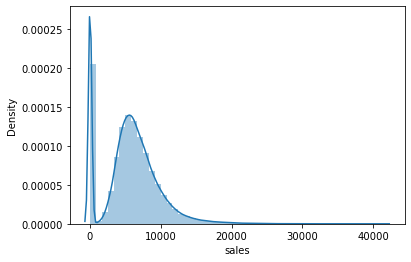

In [31]:
# Exemplo da distribuição das vendas(sales)
sns.distplot( df1["sales"])

/Users/raquelrocha/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='competition_distance', ylabel='Density'>

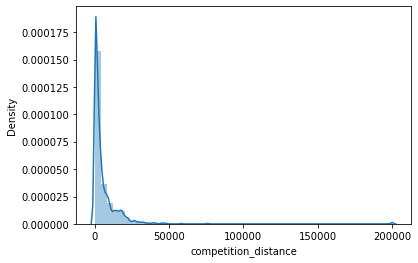

In [32]:
# Exemplo da distribuição da competition_distance
sns.distplot( df1["competition_distance"])

### 1.7.2 Categorical Attributes (Boxplot - vc tem medidas de desperção e tendência central em um local só ) 

In [33]:
# níveis cada variável categórica tem
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='state_holiday', ylabel='sales'>

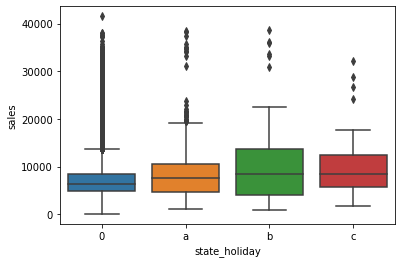

In [34]:
# Construir o boxplot
# Filtro 2 condições state_holiday e sales 
aux1 = df1[(df1["state_holiday"] !=0) & (df1["sales"] >0)]
# x(linha de referência ,nome da categoria) Y(o que vai medir, a dispersão data(dataframe)) 
sns.boxplot(x="state_holiday", y="sales", data=aux1)

<AxesSubplot:xlabel='assortment', ylabel='sales'>

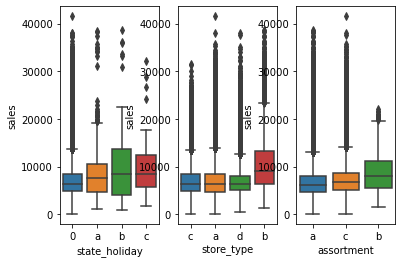

In [35]:
#colocando outras variáveis lado a lado
aux1 = df1[(df1["state_holiday"] !=0) & (df1["sales"] >0)]

plt.subplot (1, 3, 1)
sns.boxplot(x="state_holiday", y="sales", data=aux1)

plt.subplot (1, 3, 2)
sns.boxplot(x="store_type", y="sales", data=aux1)

plt.subplot (1, 3, 3)
sns.boxplot(x="assortment", y="sales", data=aux1)

# 2.0 Feature Engineering (Passo 2)
### (criar as variáveis, criar lista de hipóteses e validar as hipóteses)

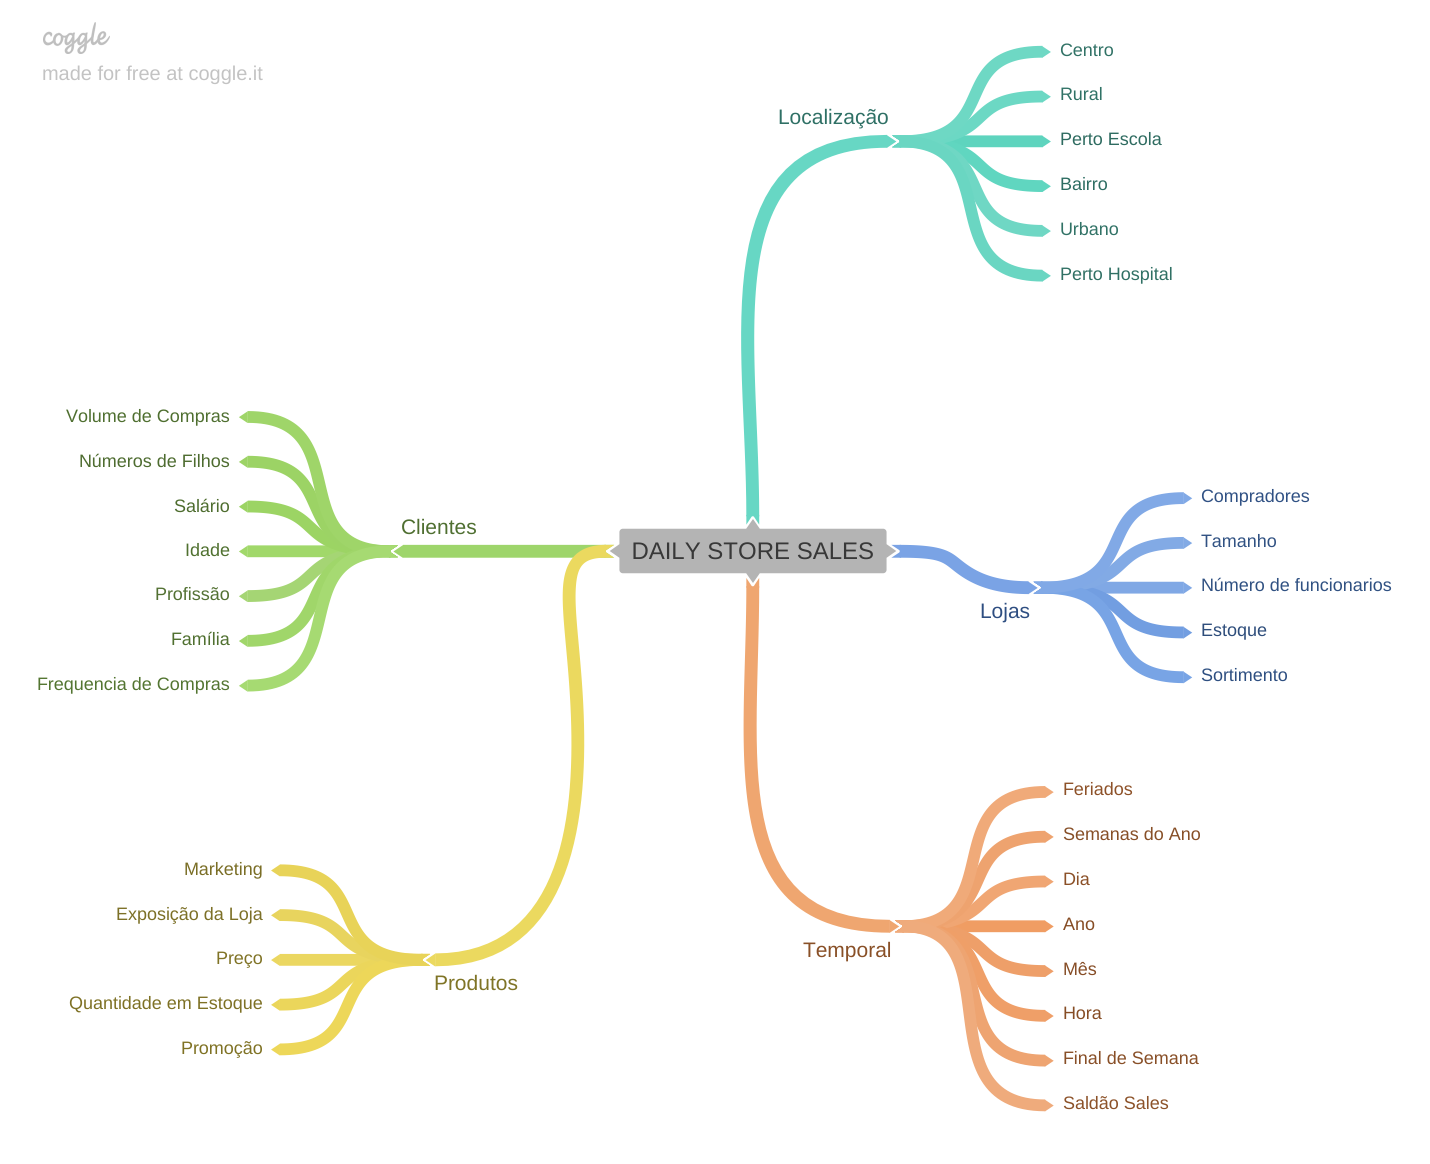

In [36]:
# aula 8 formar o mapa np=o stite coggle, salvar imagem e puchar ro arqvo jupyter
Image("MindMapHypothesis.png")

In [39]:
#Aula 10
df2 = df1.copy()

## 2.1 Criação das Hipóteses (aula 9)

### 2.1.1 Hipoteses Loja

**1.** Lojas com número maior de funcionários deveriam vender mais.

**2.** Lojas com maior capacidade de estoque deveriam vender mais.

**3.** Lojas com maior porte deveriam vender mais.

**4.** Lojas com maior sortimentos deveriam vender mais.

**5.** Lojas com competidores mais próximos deveriam vender menos.

**6.** Lojas com competidores à mais tempo deveriam vendem mais.

### 2.1.2 Hipoteses Produto

**1.** Lojas que investem mais em Marketing deveriam vender mais.

**2.** Lojas com maior exposição de produto deveriam vender mais.

**3.** Lojas com produtos com preço menor deveriam vender mais.

**4.** Lojas com promoções mais agressivas ( descontos maiores ), deveriam vender mais.

**5.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**6.** Lojas com mais dias de promoção deveriam vender mais.

**7.** Lojas com mais promoções consecutivas deveriam vender mais.

### 2.1.3 Hipoteses Tempo

**1.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**2.** Lojas deveriam vender mais ao longo dos anos.

**3.** Lojas deveriam vender mais no segundo semestre do ano.

**4.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**5.** Lojas deveriam vender menos aos finais de semana.

**6.** Lojas deveriam vender menos durante os feriados escolares.

### 2.2 Lista Final de Hipóteses

**1.** Lojas com maior sortimentos deveriam vender mais.

**2.** Lojas com competidores mais próximos deveriam vender menos.

**3.** Lojas com competidores à mais tempo deveriam vendem mais.

**4.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**5.** Lojas com mais dias de promoção deveriam vender mais.

**6.** Lojas com mais promoções consecutivas deveriam vender mais.

**7.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**8.** Lojas deveriam vender mais ao longo dos anos.

**9.** Lojas deveriam vender mais no segundo semestre do ano.

**10.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**11.** Lojas deveriam vender menos aos finais de semana.

**12.** Lojas deveriam vender menos durante os feriados escolares.

### 2.3 Feature Engineering (Aula 10 -Começamos copiando o arquivo df1 "df1.copy()")

In [90]:
# Variáveis a ser derivadas da variavel original Date 
# year 
df2["year"] = df2["date"].dt.year

# month
df2["month"] = df2["date"].dt.month

# day
df2["day"] = df2["date"].dt.day

# week of year
df2["week_of_year"] = df2["date"].dt.isocalendar().week

# year week (%Y ano, %W semana)
df2["year_week"] = df2["date"].dt.strftime("%Y-%W")


# competition since (esta em duas linhas nos dados, devemos juntar elas em uma só) day=1 para coeaçar no dia 1, considerando o mês como um todo
# método "datetime.datetime( year=x["competition_open_since_year"], month=x["competition_open_since_month"], day=1)"
# função em cima do método acima "df2.apply(lambda x: datetime.datetime( year=x["competition_open_since_year"], month=x["competition_open_since_month"], day=1)"
# se der problema de datetime not define, só importar o datetime
import datetime
df2["competition_since"] = df2.apply( lambda x: datetime.datetime( year=x["competition_open_since_year"], month=x["competition_open_since_month"], day=1 ), axis=1 )
# diferença das duas (para conseguir o mês, P.S. subtrai o date comm o q vc quer)
df2["competition_time_month"] = ((df2["date"] - df2["competition_since"])/30).apply( lambda x: x.days).astype(int)

# promo since (juntar as duas informações(precisam estar como string),semana e o ano, e depois transformar no mês) (-) é para dar espaço entre as duas informações
df2["promo_since"] = df2["promo2_since_year"].astype(str) + "-" + df2["promo2_since_week"].astype(str)
# transformar novamente em data , (x + "-1", "%Y-%W-%w") = formato de resultadoano, semana do ano, semana de domingo a domingo (o w minúsculo)
df2["promo_since"] = df2["promo_since"].apply(lambda x: datetime.datetime.strptime (x + "-1", "%Y-%W-%w") - datetime.timedelta(days=7))
#subtrai as duas datas (subtrai o date comm o q vc quer)
df2["promo_time_week"]=((df2["date"] - df2["promo_since"])/7).apply(lambda x: x.days).astype(int)

# assortment, usar o apply para colocar em todas as linhas a função lambda, (a=basic, b=extra, c=extended (informações pegas no kaggle))
df2["assortment"] = df2["assortment"].apply(lambda x: "basic" if x =="a" else "extra" if x =="b" else "extended")

# state holiday usar o apply para colocar em todas as linhas a função lambda, (a=public holiday, b=easter holiday, c=christmas (informações pegas no kaggle))
df2["state_holiday"] = df2["state_holiday"].apply(lambda x: "public_holiday" if x =="a" else "easter_holiday" if x =="b" else "christmas" if x=="c" else "regular_day")



In [92]:
# Rodar as colunas para ver os codigos feitos anterior
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


# 3.0 Filtragem de Variáveis (Passo 3) Aula11

In [93]:
df3 = df2.copy()

In [94]:
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


## 3.1 Filtragem das linhas
### começa com esse para diminuir volume dos dados que irá trabalhar.

In [101]:
# o que iremos filtrar ("open" != 0 "sales" > 0)
df3 = df3[(df3["open"] != 0) & (df3["sales"] > 0)]

## 3.2 Seleção das colunas

In [103]:
#o que não queremos ("customers", "open", "promo_interval", "month_map")
cols_drop = ["customers", "open","promo_interval", "month_map"]
# deletar (classe pandas "drop")
df3 = df3.drop(cols_drop,axis=1)

In [104]:
#verificar
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')